In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv(r"C:\Users\acer\anaconda3\Sem 3 Healthcare Project\kidney_disease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data = data.drop(columns=['id'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [6]:
#replacing the value with 0,1 

data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'\t?':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

data.rename(columns={'classification':'class'},inplace=True)

data['pe'] = data['pe'].replace(to_replace='good',value=0) 
data['appet'] = data['appet'].replace(to_replace='no',value=0)
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,'\t?':1.0,' yes':1, '':np.nan})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [8]:
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [9]:
data['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [10]:
data['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [11]:
data[['pcv','rc']] = data[['pcv','rc']].replace(to_replace = {'\t?':1.0})
data[['wc']] = data[['wc']].replace(to_replace = {'\t6200':6200,'\t8400':8400,'\t?':1.0})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [12]:
#checking the null values 
data.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [13]:
data = data.fillna(1)
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,0.0,1.0,...,38,6000,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
classes=['healthy','Un-healthy']

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
       # recall=recall_score(y_train, pred) 
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        sns.heatmap(confusion_matrix(y_test, pred), annot= True, cmap='YlGnBu',fmt = 'g')
        print(classification_report(y_test,pred))
        cm=(confusion_matrix(y_test,pred))
       # ax.xaxis.set_label_position('top')
        plt.tight_layout()
        plt.title('Confusion matrix', y = 1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
       # print(cm)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('Sensitivity (TPR) : ',TPR)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        print('Specificity (TNR) : ',TNR)
        # Overall accuracy
        print(" Overall accuracy")
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('Accuracy : ',ACC)
        print("Accuracy: {:.4f}".format(acc))
        print("Average Sensitivity: {:.4f}".format(sensitivity))
        print("Average Specificity: {:.4f}".format(specificity))
        print('\n')
        
        conf_matrix=cm
        print("=========================================")
        # save confusion matrix and slice into four pieces
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        print('True Positives:', TP)
        print('True Negatives:', TN)
        print('False Positives:', FP)
        print('False Negatives:', FN)

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

        # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        print('-'*50)
        print(f'Accuracy: {round(conf_accuracy,2)}') 
        print(f'Mis-Classification: {round(conf_misclassification,2)}') 
        print(f'Sensitivity: {round(conf_sensitivity,2)}') 
        print(f'Specificity: {round(conf_specificity,2)}') 
        print(f'Precision: {round(conf_precision,2)}')
        print(f'f_1 Score: {round(conf_f1,2)}')


In [15]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')


# Random forest classifier

In [16]:
X = data.drop('rbc', axis=1)
y = data.rbc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=10)

In [17]:
clf=RandomForestClassifier(n_estimators=100)

In [18]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [19]:
random_accuracy = metrics.accuracy_score(y_test, y_pred)

In [20]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       140
         1.0       0.78      0.94      0.85       140

    accuracy                           0.84       280
   macro avg       0.85      0.84      0.83       280
weighted avg       0.85      0.84      0.83       280



In [21]:
print(confusion_matrix(y_test,y_pred))

[[103  37]
 [  9 131]]


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[61  0]
 [ 0 59]]

Test Result:
Accuracy Score: 83.57%
_______________________________________________
Classification Report:	Precision Score: 77.98%
			Recall Score: 93.57%
			F1 score: 85.06%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       140
         1.0       0.78      0.94      0.85       140

    accuracy                           0.84       280
   macro avg       0.85      0.84      0.83       280
weighted avg       0.85      0.84      0.83       280



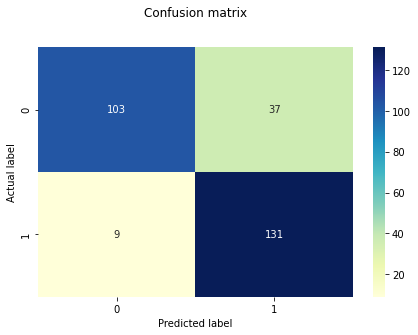

Sensitivity (TPR) :  [0.73571429 0.93571429]
Specificity (TNR) :  [0.93571429 0.73571429]
 Overall accuracy
Accuracy :  [0.83571429 0.83571429]
Accuracy: 0.8357
Average Sensitivity: 0.7357
Average Specificity: 0.9357


True Positives: 131
True Negatives: 103
False Positives: 37
False Negatives: 9
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.94
Specificity: 0.74
Precision: 0.74
f_1 Score: 0.82


In [22]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

# KNN

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [24]:
print(confusion_matrix(y_test,pred))

[[95 45]
 [61 79]]


              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       140
         1.0       0.64      0.56      0.60       140

    accuracy                           0.62       280
   macro avg       0.62      0.62      0.62       280
weighted avg       0.62      0.62      0.62       280

Train Result:
Accuracy Score: 73.33%
_______________________________________________
Classification Report:	Precision Score: 78.72%
			Recall Score: 62.71%
			F1 score: 69.81%
_______________________________________________
Confusion Matrix: 
 [[51 10]
 [22 37]]

Test Result:
Accuracy Score: 62.14%
_______________________________________________
Classification Report:	Precision Score: 63.71%
			Recall Score: 56.43%
			F1 score: 59.85%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       140
         1.0       0.64      0.56      0.60       140

    accuracy          

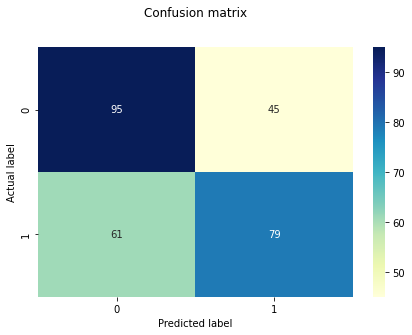

Sensitivity (TPR) :  [0.67857143 0.56428571]
Specificity (TNR) :  [0.56428571 0.67857143]
 Overall accuracy
Accuracy :  [0.62142857 0.62142857]
Accuracy: 0.6214
Average Sensitivity: 0.6786
Average Specificity: 0.5643


True Positives: 79
True Negatives: 95
False Positives: 45
False Negatives: 61
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 0.56
Specificity: 0.68
Precision: 0.68
f_1 Score: 0.62


In [25]:
print(classification_report(y_test,pred))

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

knn_acc = accuracy_score( y_test,pred)

# Decision Tree Classifier

In [26]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [27]:
dtc_acc = accuracy_score(y_test, tree.predict(X_test))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[61  0]
 [ 0 59]]

Test Result:
Accuracy Score: 80.36%
_______________________________________________
Classification Report:	Precision Score: 83.46%
			Recall Score: 75.71%
			F1 score: 79.40%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       140
         1.0       0.83      0.76      0.79       140

    accuracy                           0.80       280
   macro avg       0.81      0.80      0.80       280
weighted avg       0.81      0.80      0.80       280



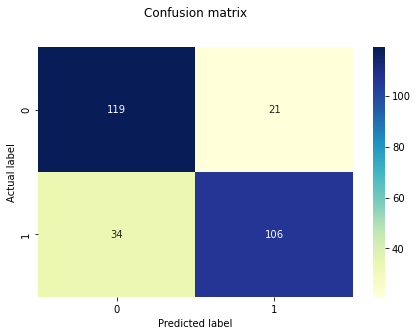

Sensitivity (TPR) :  [0.85       0.75714286]
Specificity (TNR) :  [0.75714286 0.85      ]
 Overall accuracy
Accuracy :  [0.80357143 0.80357143]
Accuracy: 0.8036
Average Sensitivity: 0.8500
Average Specificity: 0.7571


True Positives: 106
True Negatives: 119
False Positives: 21
False Negatives: 34
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.76
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.8


In [28]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

# SVM

In [29]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0, probability=True)
svm_model.fit(X_train, y_train)

SVC(gamma=0.1, probability=True)

In [30]:
sev_pred = accuracy_score(y_test, svm_model.predict(X_test))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[61  0]
 [ 0 59]]

Test Result:
Accuracy Score: 50.00%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
_______________________________________________


C:\Users\acer\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\envs\DAB200\lib\sit

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       140
         1.0       0.00      0.00      0.00       140

    accuracy                           0.50       280
   macro avg       0.25      0.50      0.33       280
weighted avg       0.25      0.50      0.33       280



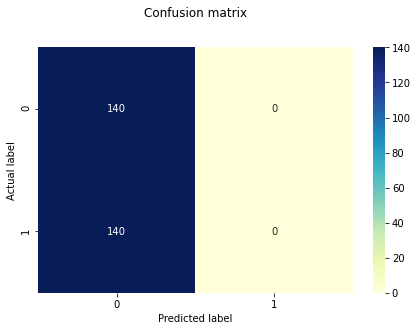

Sensitivity (TPR) :  [1. 0.]
Specificity (TNR) :  [0. 1.]
 Overall accuracy
Accuracy :  [0.5 0.5]
Accuracy: 0.5000
Average Sensitivity: 1.0000
Average Specificity: 0.0000


True Positives: 0
True Negatives: 140
False Positives: 0
False Negatives: 140
--------------------------------------------------
Accuracy: 0.5
Mis-Classification: 0.5
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0


In [31]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

# MLPClassifier

Train Result:
Accuracy Score: 57.50%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 13.56%
			F1 score: 23.88%
_______________________________________________
Confusion Matrix: 
 [[61  0]
 [51  8]]

Test Result:
Accuracy Score: 53.57%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 7.14%
			F1 score: 13.33%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68       140
         1.0       1.00      0.07      0.13       140

    accuracy                           0.54       280
   macro avg       0.76      0.54      0.41       280
weighted avg       0.76      0.54      0.41       280



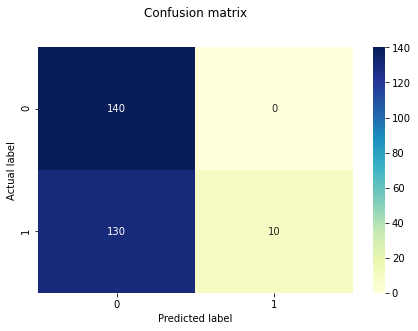

Sensitivity (TPR) :  [1.         0.07142857]
Specificity (TNR) :  [0.07142857 1.        ]
 Overall accuracy
Accuracy :  [0.53571429 0.53571429]
Accuracy: 0.5357
Average Sensitivity: 1.0000
Average Specificity: 0.0714


True Positives: 10
True Negatives: 140
False Positives: 0
False Negatives: 130
--------------------------------------------------
Accuracy: 0.54
Mis-Classification: 0.46
Sensitivity: 0.07
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.13


In [32]:
NN=MLPClassifier(hidden_layer_sizes=(10,50),momentum=0.9,solver='sgd',random_state=100)
               
NN.fit(X_train, y_train)

mlp_pred = accuracy_score(y_test, NN.predict(X_test))


print_score(NN, X_train, y_train, X_test, y_test, train=True)
print_score(NN, X_train, y_train, X_test, y_test, train=False)

In [33]:
models = pd.DataFrame({'Model' : [ 'rendom', 'knn','Decision',
             'svc', 'MLP'],
                            'Score' : [ random_accuracy,knn_acc,dtc_acc,sev_pred,mlp_pred]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,rendom,0.835714
2,Decision,0.803571
1,knn,0.621429
4,MLP,0.535714
3,svc,0.500000


In [34]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [35]:
dt = {'age':[50], 'bp':[90], 'sg':[1.03], 'al':[4], 'su':[2], 'pc':[0], 'pcc':[1], 'ba':[0], 'bgr':[106], 'bu':[56],
       'sc':[2.7], 'sod':[142], 'pot':[3.4], 'hemo':[10.8], 'pcv':[16], 'wc':[9600], 'rc':[3.8], 'htn':[1], 'dm':[0], 'cad':[0],
       'appet':[1], 'pe':[1], 'ane':[0], 'class':[1]}

data_preds = pd.DataFrame(dt)

In [39]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [37]:
y_pred=clf.predict(data_preds)

In [38]:
label = {0:"no risk",1:"risk"}
label[y_pred[0]]

'no risk'